In [1]:
import os
import logging
import pandas as pd

from stellr import Population

In [2]:
scale = 'DR14_ASPC'
inputs = pd.read_csv(f'../../data/stellr/inputs_{scale}.csv')

# stars_results = pd.read_csv(f'stars_results/{scale}/stars/results.csv')  # Previous model results
stars_results = pd.read_csv(f'population_results/partial_pool/{scale}/population/stars/results.csv')

In [3]:
stars_results['bad_mlt'] = 0
stars_results.loc[stars_results['mlt_r_hat'] > 1.4, 'bad_mlt'] = 1
stars_results[stars_results['bad_mlt']==1]

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,bad_mlt


In [4]:
# data = inputs.merge(stars_results, on='name')
data = inputs.merge(stars_results.loc[stars_results['bad_mlt']==0], on='name')
data.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,bad_mlt
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,21987.408978,14121.078176,-0.288758,-0.023304,0.000484,0.000342,-0.158699,1.000366,0.071791,0
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,5832.161850,7456.690663,-0.405644,-0.181206,0.000778,0.000554,-0.290715,1.001446,0.059802,0
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,24668.334019,14872.057683,-0.343346,-0.165625,0.000285,0.000212,-0.258109,1.000187,0.047182,0
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,13063.515791,11933.841195,-0.264689,-0.008875,0.000604,0.000427,-0.137017,1.000642,0.069086,0
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,16708.992674,13260.828687,-0.418825,-0.156410,0.000514,0.000385,-0.288834,1.000233,0.070338,0


In [5]:
sun = {
    'name': 'SUN',
    'mass': 1.0, 'mass_err': 0.001,
    'age': 4.6, 'age_err': 0.1,
    'teff': 5777., 'teff_err': 20.,
    'rad': 1.0, 'rad_err': 0.001,
    'lum': 1.0, 'lum_err': 0.01,
    'dnu': 135.1, 'dnu_err': 0.2,
    'mhs': 0.0, 'mhs_err': 0.01,
}

In [6]:
data = data.append(sun, ignore_index=True)
data.tail()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_mean,mhs_r_hat,mhs_sd,bad_mlt,age,age_err,mass,mass_err,rad,rad_err
59,KIC8424992,5517.5083,128.72182,0.985946,0.029900,120.914,0.305,-0.095701,0.074718,4.340031,...,-0.071957,1.001008,0.074224,0.0,NaN,NaN,NaN,NaN,NaN,NaN
60,KIC9266926,5781.6396,133.60810,2.231382,0.076240,75.081,1.458,-0.298283,0.071068,4.070394,...,-0.282149,0.999973,0.071167,0.0,NaN,NaN,NaN,NaN,NaN,NaN
61,KIC3735871,5960.3850,131.76004,1.366482,0.043845,122.856,0.472,-0.029106,0.075043,4.404094,...,-0.021003,1.000070,0.071875,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62,KIC11027406,5923.8970,136.09485,1.955169,0.069971,88.314,0.954,-0.208151,0.074160,4.173365,...,-0.190599,1.000251,0.073673,0.0,NaN,NaN,NaN,NaN,NaN,NaN
63,SUN,5777.0000,20.00000,1.000000,0.010000,135.100,0.200,0.000000,0.010000,NaN,...,NaN,NaN,NaN,NaN,4.6,0.1,1.0,0.001,1.0,0.001


In [7]:
print('Length = ', len(data))

Length =  64


In [8]:
observed = {
    'population/stars': data
}

In [9]:
pop = Population(name=scale, path='population+sun_results/partial_pool', observed=observed)

logging.basicConfig(
    format='%(asctime)s: %(levelname)s: %(message)s', 
    filename=os.path.join(pop.savedir, 'pop.log'), 
    level=logging.INFO,
)

2020-08-25 16:37:41,696 stellr.models WARNING  Key 'population' not in observed keys, no observations for this level will be assumed


In [10]:
sample_kwargs = {
    'num_samples': 2000,
    'burn_in': 2000,
    'num_chains': 10,
    'xla': True,
    'adaptation_kwargs': {
        'target_accept_prob': 0.98,
    },
}

In [11]:
%%time
pop.fit(sample_kwargs=sample_kwargs)

2020-08-25 16:37:47,963 stellr.optimizer INFO     Fitting population for 2000 samples across 10 chains with 2000 burn in steps per chain.
2020-08-25 17:25:30,611 stellr.optimizer WARNING  The number of effective samples was less than 10% for 502 parameters.
2020-08-25 17:25:30,618 stellr.optimizer WARNING  The number of effective samples was less than 25% for 894 parameters.


CPU times: user 47min 28s, sys: 30.3 s, total: 47min 58s
Wall time: 47min 55s


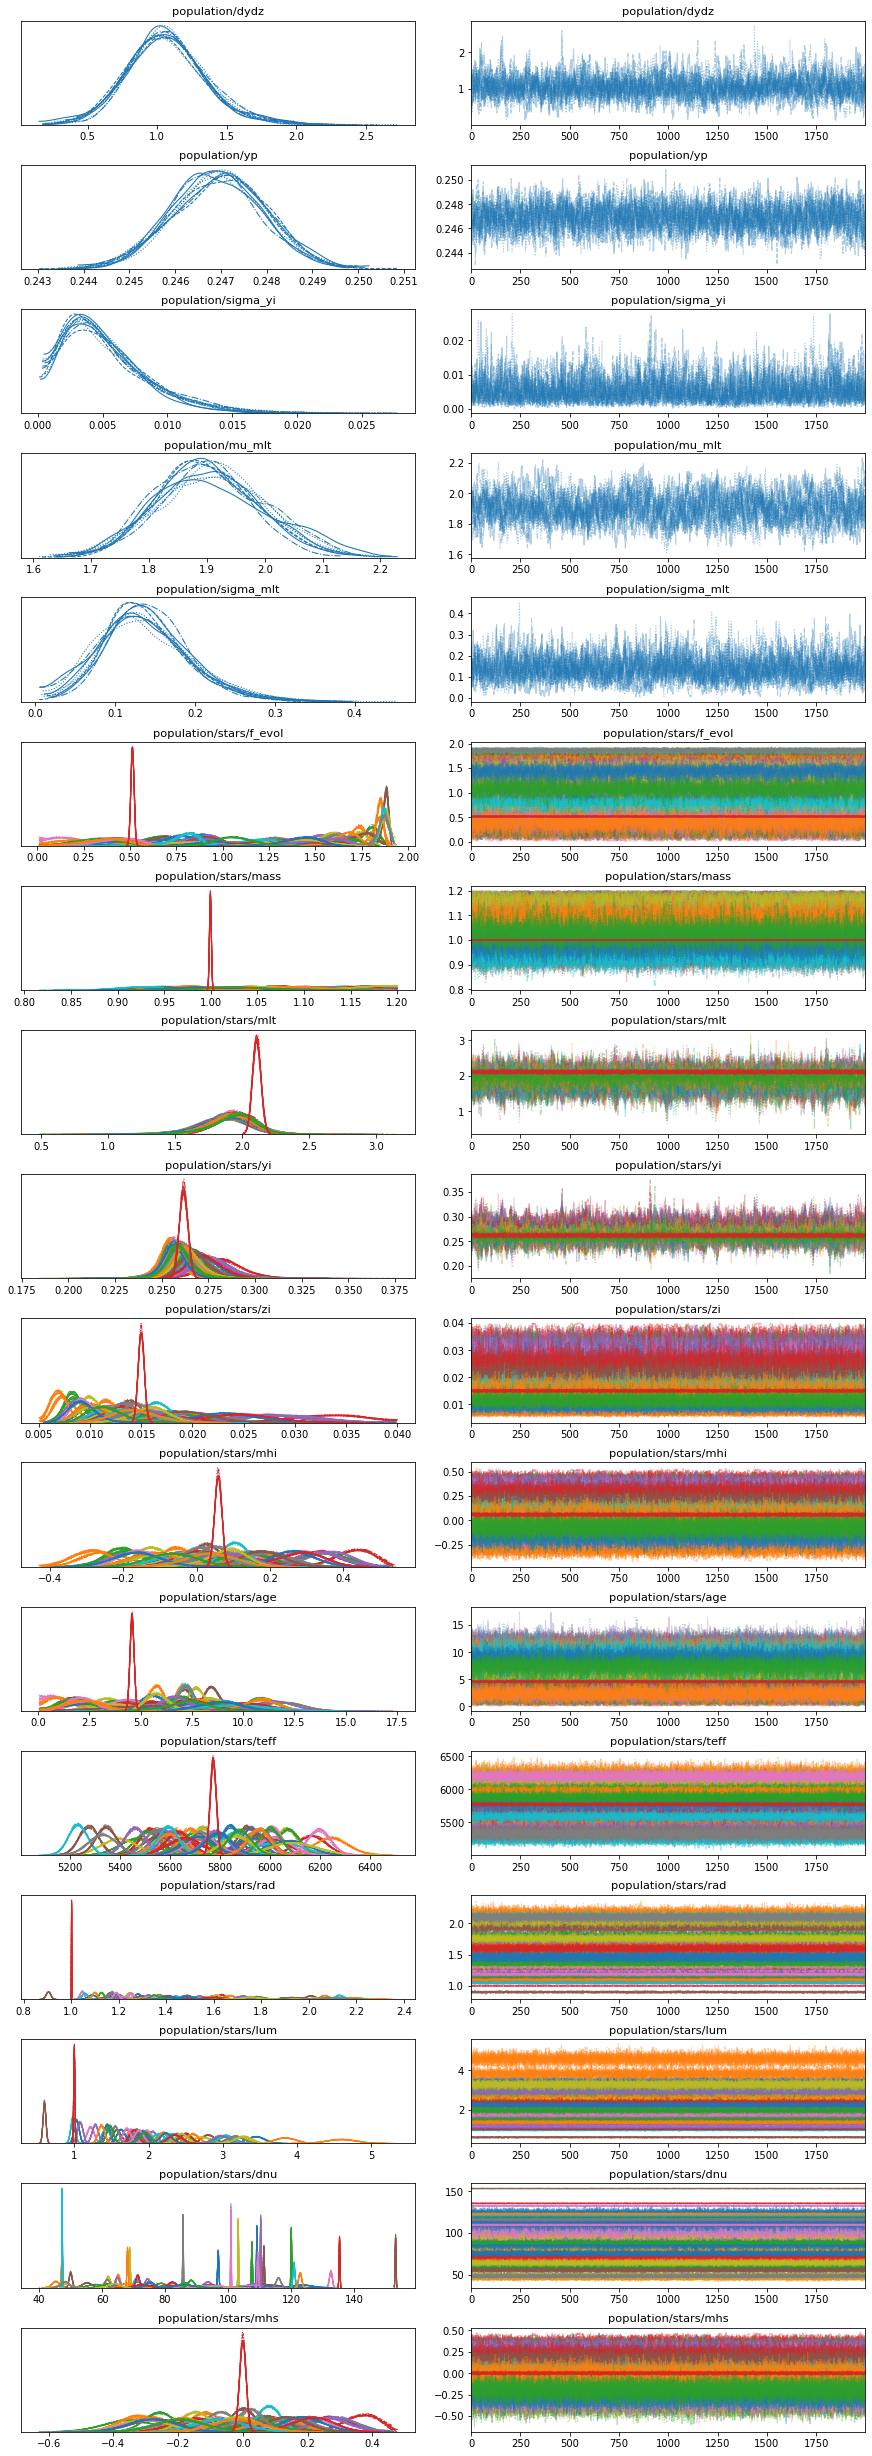

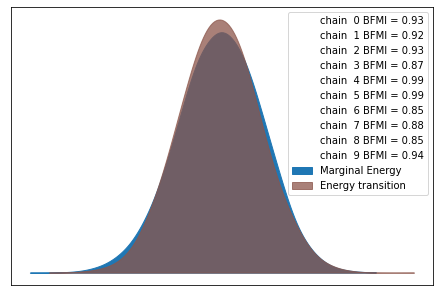

In [12]:
pop.plot_diagnostics(save=True);

In [13]:
pop.plot_corners(save=True)